In [1]:
from datetime import date, timedelta
import yfinance as yf
import mercury as mr
import pandas as pd
import mplfinance as mpf

In [2]:
app = mr.App(title="Ticker Report", description="Report financial data for selected ticker")

mercury.App

In [3]:
ticker = mr.Text(label="Ticker", value="NVDA")

mercury.Text

In [4]:
weeks = mr.Slider(label="Weeks", value=52, min=4, max=260)

mercury.Slider

In [5]:
start = date.today() - timedelta(weeks.value*7)
end = date.today() + timedelta(2)
df = pd.DataFrame(yf.download(ticker.value, start=start, end=end, progress=False))

In [6]:
mr.NumberBox([
    mr.NumberBox(data=ticker.value),
    mr.NumberBox(data=df.High.max().round(1), title=f"{weeks.value}-Week High"),
    mr.NumberBox(data=df.Low.min().round(1), title=f"{weeks.value}-Week Low")
])
                 

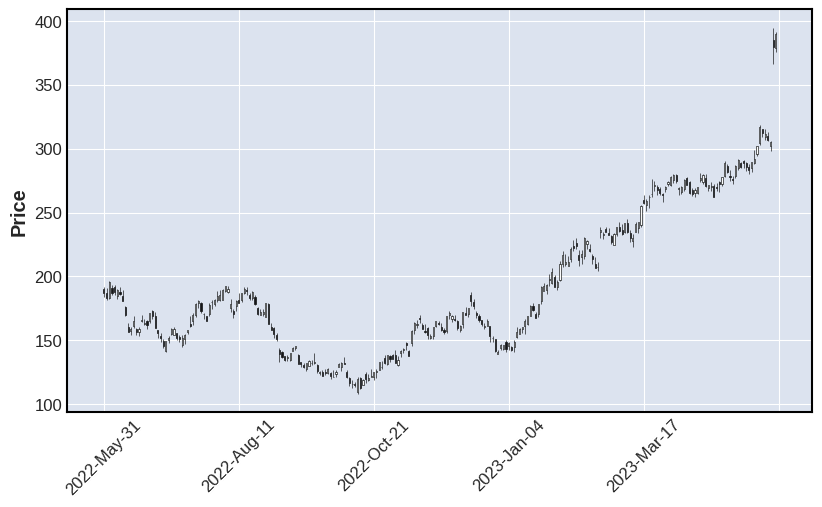

In [7]:
plot_type = "candle" if weeks.value < 53 else "line"
mpf.plot(df, type=plot_type, figratio=(18,10))

In [8]:
df.tail(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-05-15,285.079987,289.690002,281.519989,289.529999,289.529999,29392600
2023-05-16,288.410004,298.700012,288.320007,292.130005,292.130005,44940500
2023-05-17,295.839996,301.989990,294.299988,301.779999,301.779999,43253500
2023-05-18,304.100006,318.279999,303.200012,316.779999,316.779999,74872500
2023-05-19,315.359985,315.799988,309.160004,312.640015,312.640015,47312400
2023-05-22,309.010010,315.200012,306.799988,311.760010,311.760010,37200000
2023-05-23,310.000000,312.880005,306.309998,306.880005,306.880005,35625300
2023-05-24,302.100006,306.070007,298.059998,305.380005,305.380005,72141900
2023-05-25,385.230011,394.799988,366.350006,379.799988,379.799988,154391100
